<a href="https://colab.research.google.com/github/IsaaHack/IA/blob/main/P1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático - Práctica 1 - Experimentación con clasificadores y regresores

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 14 de Abril de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>ISAAC BRAO AISSAONI</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: EL PROBLEMA DEL SOBREAJUSTE (2 puntos)</font>

<font color='blue'>Aprendizaje Automático (AA) es la rama de la Inteligencia Artificial (IA) que se ocupa de diseñar e implementar máquinas que sean capaces de aprender a realizar una determinada tarea a partir de los propios datos (es decir, sin necesidad de ser programadas explícitamente para ello). El principal objetivo de los modelos de AA es realizar predicciones/estimaciones más allá de los conjuntos de datos con los que fueron entrenados y, como es lógico, se pretende que dichos modelos sean capaces de $generalizar$ más allá de los ejemplos vistos en entrenamiento. Como consecuencia, uno de los mayores obstáculos a los que nos enfrentamos se conoce como $sobreajuste$ ($overfitting$): el hecho de que nuestros pesos/parámetros estén demasiado apegados a nuestros ejemplos de entrenamiento, y se produzca una brecha a nivel de generalización (en donde los resultados en entrenamiento serían manifiestamente mejores que en test).

<font color='blue'>En este ejercicio intentaremos profundizar un poco en lo que es el sobreajuste, así como las causas y consecuencias del mismo.



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [ ]:
import sklearn
if sklearn.__version__ < '1.3':
  # Actualizamos scikit-learn para tener la última versión.
  # Nos interesa de cara a disponer de las más recientes funcionalidades
  # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


La versión de scikit-learn es:  1.4.2






---






### <font color='blue'>Ejercicio 1.A: Regresión en 1D (1 punto)</font>

<font color='blue'> En este ejercicio se intentará aproximar una función continua unidimensional por medio de regresión lineal (`LinearRegression()`), y se irá, progresivamente, incrementando la complejidad del modelo empleando características polinomiales (`PolynomialFeatures()`), de grados $\{1, 2, 4, 8, 16, 32\}$. La función real a aproximar (nuestra $\textit{ground truth}$) es: $f(x) = cos(1.5\cdot\pi\cdot x) + sin(0.5\cdot\pi\cdot x)$.

<font color='blue'> Las tareas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código de la función real a aproximar.
2.   Generamos las entradas ($X$): 20 puntos aleatorios en el intervalo $[0,1]$.
3.   Generamos las salidas deseadas ($y$): el valor resultante de emplear la función real y sumarle un cierto error aleatorio (`np.random.randn`: distribución Normal estándar), que pretende simular el ruido que pueden contener las etiquetas ($labels$/$targets$) en cualquier problema.
4.   Generamos las características polinomiales asociadas con los grados proporcionados, y creamos un $pipeline$ (usando `Pipeline` o `make_pipeline`) con dichas características y regresión lineal.
5.   Realizamos el ajuste (`fit`) de dicho `pipeline` con $X$ e $y$, y empleamos `cross_val_score`, o `cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error.
6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio.
7. Junto con estas figuras, se debe mostrar una tabla (y aquí la librería `tabulate` puede ser de utilidad) que incluya, el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas: ¿se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

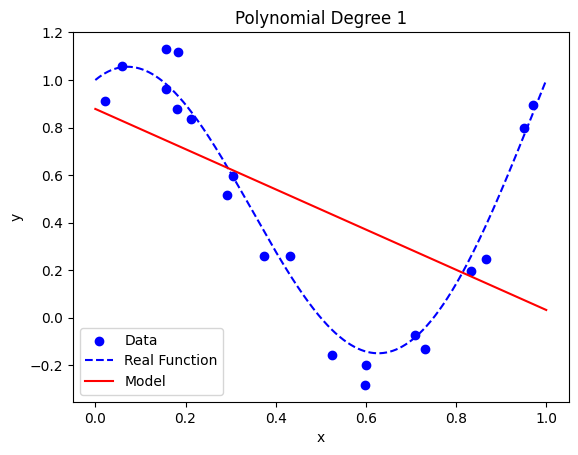

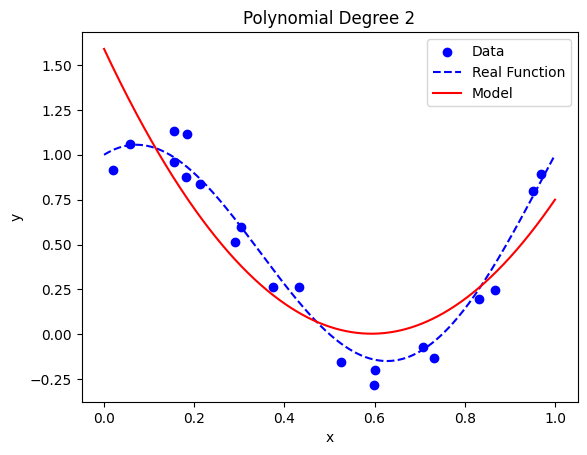

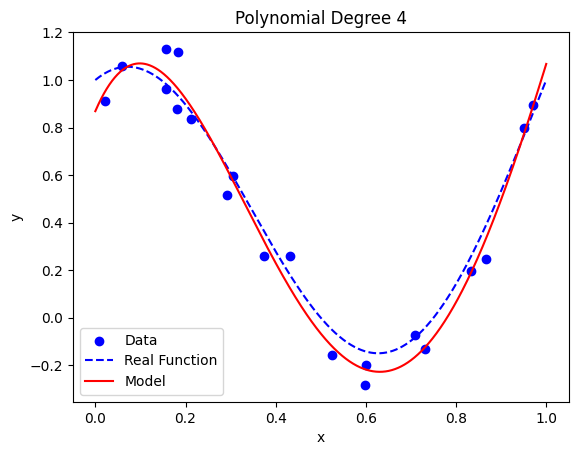

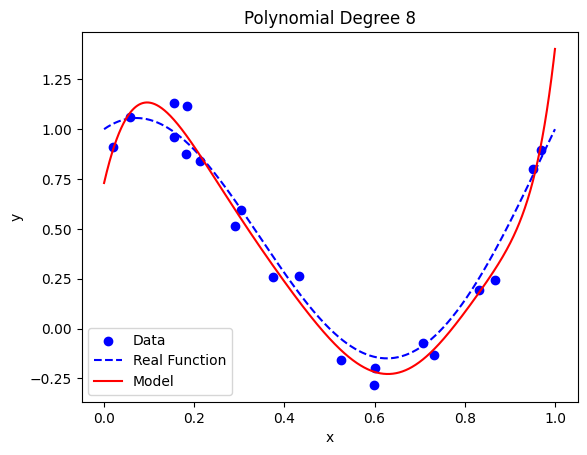

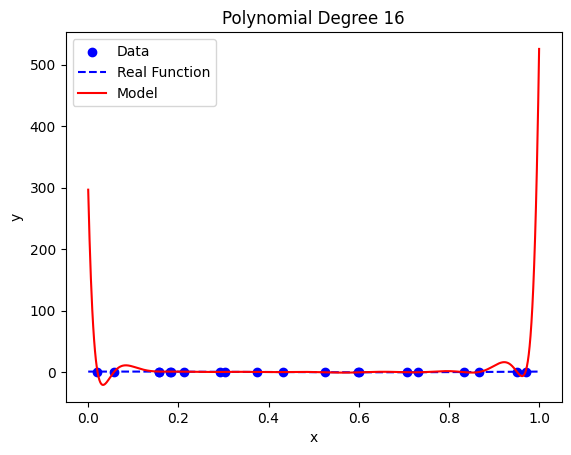

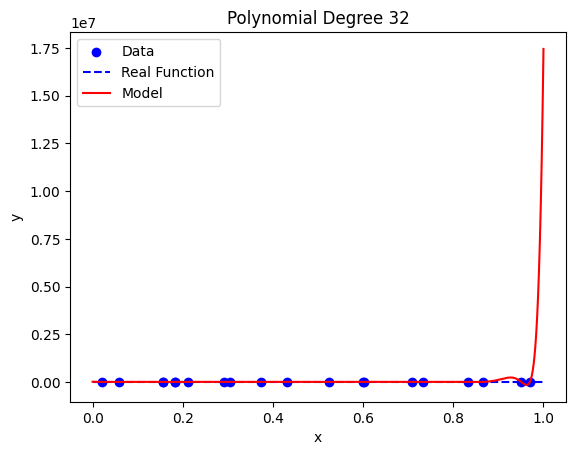

Resultados:
Resultados:
+----------+---------------------------------------------------------------------------+--------------------+-------------------+-------------------+------------------+-----------------+
|   Degree | # Coefficients                                                            |   Train MSE (mean) |   Train MSE (std) |   Test MSE (mean) |   Test MSE (std) |   Mean Coef Abs |
|----------+---------------------------------------------------------------------------+--------------------+-------------------+-------------------+------------------+-----------------|
|        1 | [ 0.  ,-0.85]                                                             |        0.158315    |       0.0159274   |       0.223113    |      0.174224    |     0.424618    |
|        2 | [ 0.  ,-5.35, 4.51]                                                       |        0.0512122   |       0.00773051  |       0.0871673   |      0.0978395   |     3.29811     |
|        4 | [  0.  ,  4.4 ,-27.4 , 36.23

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate
import pandas as pd

def funcionReal(X):
    return np.cos(1.5 * np.pi * X) + np.sin(0.5 * np.pi * X)

n_samples = 20
degrees = [1, 2, 4, 8, 16, 32]

X = np.random.rand(n_samples)
y = funcionReal(X) + np.random.randn(n_samples) * 0.1

# a cubrir por el alumnado

results = []

for degree in degrees:
    pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    cv_results = cross_validate(pipeline, X.reshape(-1, 1), y, cv=10, scoring='neg_mean_squared_error', return_train_score=True, return_estimator=True)

    train_mse = -cv_results['train_score'].mean()
    train_std = cv_results['train_score'].std()
    test_mse = -cv_results['test_score'].mean()
    test_std = cv_results['test_score'].std()
    coef_abs_mean = np.abs([estimator.named_steps['linearregression'].coef_ for estimator in cv_results['estimator']]).mean()

    pipeline.fit(X.reshape(-1, 1), y)
    X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
    y_plot = pipeline.predict(X_plot)

    plt.figure()
    plt.scatter(X, y, label='Data', color='blue')
    plt.plot(X_plot, funcionReal(X_plot.squeeze()), label='Real Function', color='blue', linestyle='--')
    plt.plot(X_plot, y_plot, label='Model', color='red')
    plt.title(f'Polynomial Degree {degree}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    results.append([degree, pipeline.named_steps['linearregression'].coef_, train_mse, train_std, test_mse, test_std, coef_abs_mean])

# Convertir resultados a DataFrame de Pandas
df_results = pd.DataFrame(results, columns=["Degree", "# Coefficients",
                                            "Train MSE (mean)", "Train MSE (std)",
                                            "Test MSE (mean)", "Test MSE (std)",
                                            "Mean Coef Abs"])

# Mostrar DataFrame de Pandas
print("Resultados:")
df_results["# Coefficients"] = df_results["# Coefficients"].apply(lambda x: np.array2string(x, precision=2, separator=','))
print("Resultados:")
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False))

Se observa como con grado 1 el MSE de Test es mayor que con grados mayores. Por tanto en grado 1 se observa underfitting. Pero cuando aumentan los grados de libertad, el MSE de Train va disminuyendo y en Test también. Con grado 4 se alcanza el óptimo en Test, pero cuando aumenta a más de 4 se observa overfitting. Con grados mayores de 4, el MSE de Test aumenta cosiderablemente, mientras que el modelo se ajusta mejor a Train con un MSE muy bajo.

### <font color='blue'>Ejercicio 1.B: Clasificación en 2D (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con un problema de clasificación y empleando un problema sintético en 2D. Haremos uso de dos funciones, que se incluyen a continuación:

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [ ]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

In [ ]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.

    return a, b


<font color='blue'>Ahora, con ayuda de la función $simula\_unif()$, vamos a generar una muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$ (es decir, el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$).




In [ ]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [ ]:
intervalo = [-50,50]
[a, b] = simula_recta(intervalo)
new_points = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points.shape[0]):
    y.append(f(new_points[i][0], new_points[i][1], a, b))

y = np.array(y, np.float64)

<font color='blue'>A continuación, calculamos el error de clasificación de dicha recta ideal, y visualizamos el ajuste obtenido. Como es lógico, el error es 0% dado que lo único que estamos haciendo es mostrar los puntos etiquedatos con la recta que acabamos de crear.

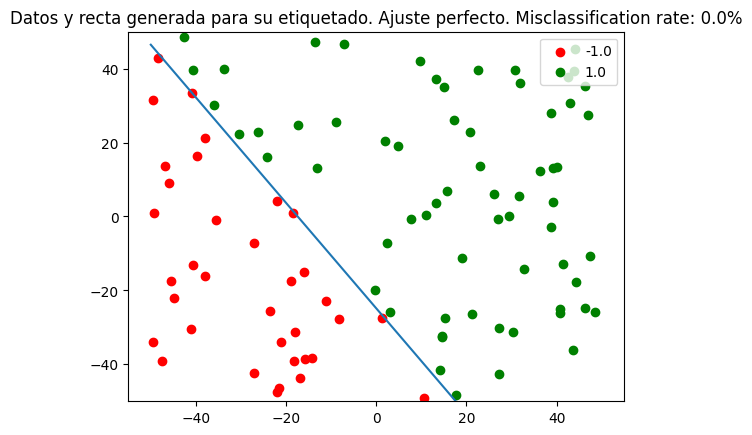

In [ ]:
errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

# Dibujamos una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
clases = np.unique(y)
X_class = [new_points[y==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

# plt.scatter(new_points[:,0],new_points[:,1], c=y)
plt.legend(loc='upper right')
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: {}%'.format(MC_rate))
plt.show()

<font color='blue'>Vamos a modificar de forma aleatoria un 5\% de las etiquetas positivas y otro 5\% de las negativas. Esta modificación de etiquetas está asociada con el ruido que siempre puede estar presenta en las etiquetas (sea por problemas en la transmisión de los datos, la precisión de los sistemas de medición, la incertidumbre ligada al proceso de adquisición y anotación de los datos, etc.) En esta ocasión, a pesar de que la recta empleada es la recta ideal (es decir, la propia función empleada para generar nuestra muestra original), habrá un cierto porcentaje de error asociado.  </font>

In [ ]:
def introducir_ruido(y,porcent_ruido):
  # Identificamos las clases a partir de las etiquetas
  classes = np.unique(y)
  # Creamos una copia de las etiquetas, que será el array ruidoso que produciremos como salida
  y_noise = y.copy()
  # Ahora vamos recorriendo cada una de las clases
  for i in range(len(classes)):
    # Calculamos el número de ejemplos por clase a modificar
    numberPerClass = int(np.round(np.sum(y==classes[i])*porcent_ruido/100))
    # Recuperamos los índices de los ejemplos de cada clase y los desordenamos
    clase = np.where(y == classes[i])
    clase = np.random.permutation(clase[0])
    # Alteramos (introducimos ruido en) los índices correspondientes
    for i in clase[:numberPerClass]:
      y_noise[i] = y[i]*-1

  return y_noise

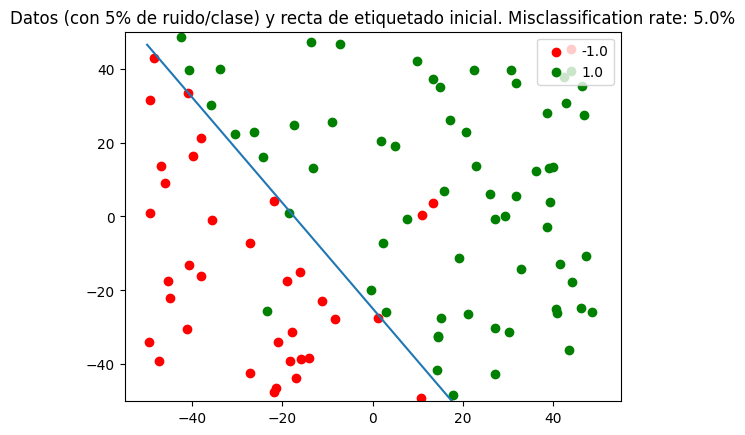

In [ ]:
# Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta,
# junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

porcentaje_ruido = 5
y_noise = introducir_ruido(y,porcentaje_ruido)

errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y_noise[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

plt.figure()

clases = np.unique(y_noise)
X_class = [new_points[y_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()



<font color='blue'>Ahora queremos entrenar un $\textit{Support Vector Machine}$
 (`sklearn.svm.SVC` con kernel lineal) con estos datos y mostrar $accuracy$ y $f1$-$score$, tanto en entrenamiento como test, así como las fronteras de decisión encontradas. Una frontera de decisión ($\textit{decision boundary}$) es la superficie/hiperplano que separa el espacio de entradas de modo que, en el contexto de un problema de clasificación binaria como el que nos ocupa, el clasificador etiquete todos los puntos de un lado de la frontera como pertenecientes a una clase y todos los del otro lado como pertenecientes a la otra.

 <font color='blue'>Vamos a repetir la operación anterior con distintas transformaciones (polinómicas) de los datos de entrada (grados $1, 2, 4$ y $8$). Queremos explorar cómo cambian estas fronteras de decisión a medida que incrementamos la complejidad de los modelos empleados.

 <font color='blue'> Más concretamente, tenemos que mostrar los siguientes resultados:
* <font color='blue'>Fronteras de decisión 2D sobre datos de entrenamiento para cada uno de los 4 ajustes (e incluyendo una línea que represente la frontera ideal, es decir, la correspondiente con la recta generadora de las etiquetas y que nos gustaría aproximar). Para esta visualización pueden resultar de utilidad las siguientes funciones: `contourf`, `ListedColormap` o `DecisionBoundaryDisplay`; y el siguiente script: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
* <font color='blue'>Una tabla que incluya el grado de polinomio empleado (en la primera fila), el número de pesos ajustados (en la segunda fila), y los errores de entrenamiento y test con cada uno de los modelos ajustados ($accuracy$ y $f1$-$score$), en las filas tercera y cuarta de la tabla, respectivamente. De cara a evaluar el error de test, en este caso crearemos un conjunto de test diferenciado (con 100 ejemplos) siguiendo exactamente el mismo proceso empleado para el conjunto de entrenamiento. Este error de test se utilizará como estimación del error fuera de la muestra (lo que se conoce como $\textit{out-of-sample error}$).

<font color='blue'>Desde el punto de vista de entrenamiento del modelo, se recomienda emplear $SVC$ atendiendo a los siguientes aspectos: es importante escalar los datos antes de entrenar (`StandardScaler`); no nos interesa emplear regularización a la hora de entrenar el modelo (¿por qué?), motivo por el cual tendremos que escoger un valor elevado para el hiperparámetro $C$; tendremos que escoger un valor de iteraciones suficientemente alto como para permitir que el modelo entrene adecuadamente, pero suficientemente bajo como para que el entrenamiento no se eternice; y, finalmente, recordemos que el kernel a emplear es linear (¿cuál emplea SVC por defecto?).

<font color='blue'>El alumnado debe describir en detalle el trabajo realizado, las decisiones tomadas, así como las conclusiones extraídas a partir de los resultados obtenidos.

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

degrees = [1, 2, 4, 8]

cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Función para visualizar fronteras de decisión
def plot_decision_boundary(X_train, y_train, X_test, y_test, model, title):
    cm = plt.cm.RdBu
    ax = plt.gca()
    x_min = -50
    x_max = 50
    y_min = -50
    y_max = 50

    DecisionBoundaryDisplay.from_estimator(model, X_train, cmap=cm, alpha=0.8, eps=0.5, ax=ax)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', s=60, label='Train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k', s=60, marker='^', label='Test')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()
    plt.show()

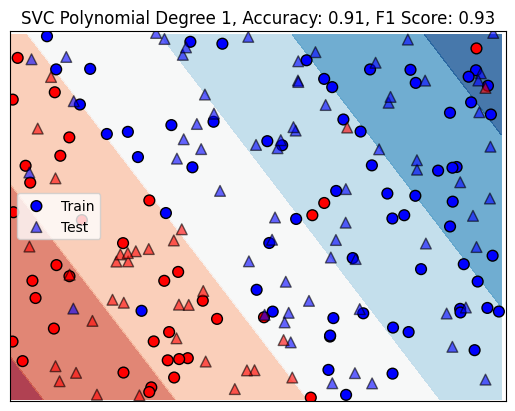

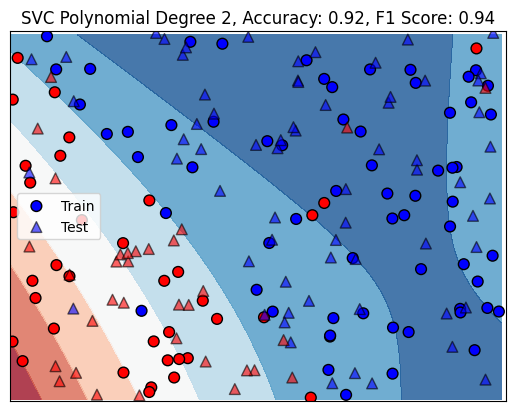

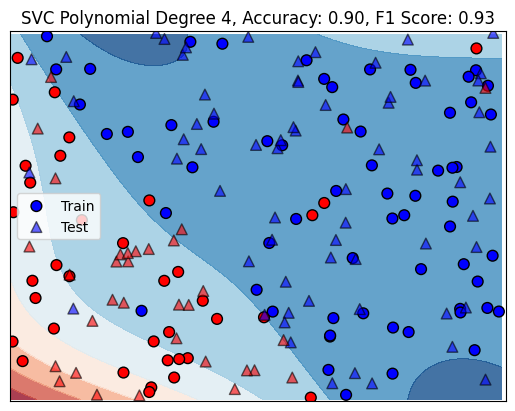

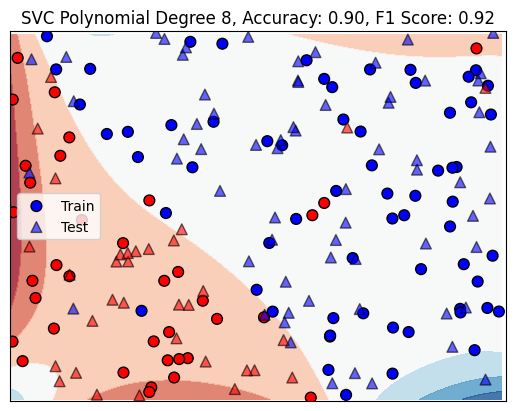

Resultados:
+----------+-------------+------------------+-----------------+------------+-----------+
|  Degree  |  # Weights  |  Train Accuracy  |  Test Accuracy  |  Train F1  |  Test F1  |
|----------+-------------+------------------+-----------------+------------+-----------|
|    1     |      3      |       0.93       |      0.91       |  0.946565  | 0.933333  |
|    2     |      6      |       0.91       |      0.92       |  0.932331  | 0.942029  |
|    4     |     15      |       0.96       |       0.9       |  0.969231  | 0.925373  |
|    8     |     45      |       0.96       |       0.9       |  0.969231  | 0.923077  |
+----------+-------------+------------------+-----------------+------------+-----------+


In [ ]:
# a cubrir por el alumnado
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

X_train = new_points
y_train = y_noise

X_test = simula_unif(100, 2, [-50,50])
y_test = []
for i in range(0,X_test.shape[0]):
    y_test.append(f(X_test[i][0], X_test[i][1], a, b))

y_test = np.array(y_test, np.float64)

y_test = introducir_ruido(y_test,porcentaje_ruido)

results = []

for degree in degrees:
    pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree), SVC(kernel='linear'))

    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_pred = pipeline.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_pred)
    n_pesos_ajustados = pipeline.named_steps['polynomialfeatures'].n_output_features_

    plot_decision_boundary(X_train, y_train, X_test, y_test, pipeline, f'SVC Polynomial Degree {degree}, Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}')

    results.append([degree, n_pesos_ajustados, train_accuracy, test_accuracy, train_f1, test_f1])

# Convertir resultados a DataFrame de Pandas
df_results = pd.DataFrame(results, columns=["Degree", "# Weights", "Train Accuracy", "Test Accuracy", "Train F1", "Test F1"])

print("Resultados:")
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False, numalign='center'))



---



Se observa como con grados altos como 4 u 8 se genera overfitting, alto acierto y f1 en train, y bajo en test. Se encuentra en el punto óptimo en el grado 2. También se observa en los plots donde en los grados 1 y 2 se distinguen bastante bien las clases, mientras que cuantos más grados es más dificil de diferenciar las clases.

## <font color='blue'>Ejercicio 2: PROBLEMA DE CLASIFICACIÓN (4 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema de $\textit{Optical Recognition of Handwritten Digits}$ (https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Este conjunto de datos contiene información sobre distintos dígitos manuscritos: cada fila contiene 64 valores enteros (en el rango $[0, 16]$) y un valor entero
(que se encuentra en el rango $[0, 9]$) que se corresponde con el dígito manuscrito a clasificar. En total hay 64 características/$features$ y 5620 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.





In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clasificacion/'

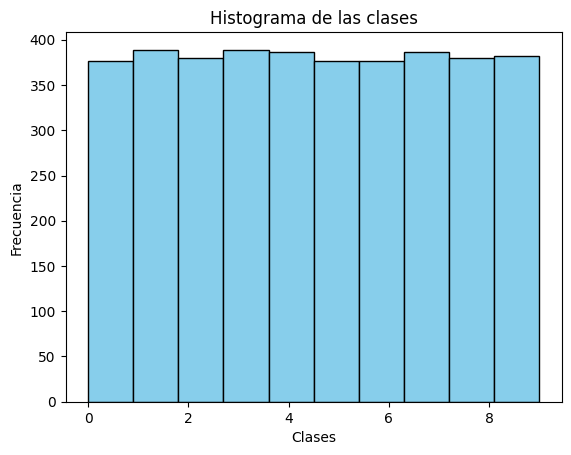

In [ ]:
# a cubrir por el alumnado
import pandas as pd
import matplotlib.pyplot as plt

# Leer los archivos
train = pd.read_csv(dataFolder + 'optdigits.tra', header=None)
test = pd.read_csv(dataFolder + 'optdigits.tes', header=None)

# Obtener la última columna del DataFrame
ultima_columna = train.iloc[:, -1]

# Trazar el histograma de la última columna
plt.hist(ultima_columna, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Histograma de las clases')
plt.show()



Como se puede observar el número de instancias de cada clase está balanceada.

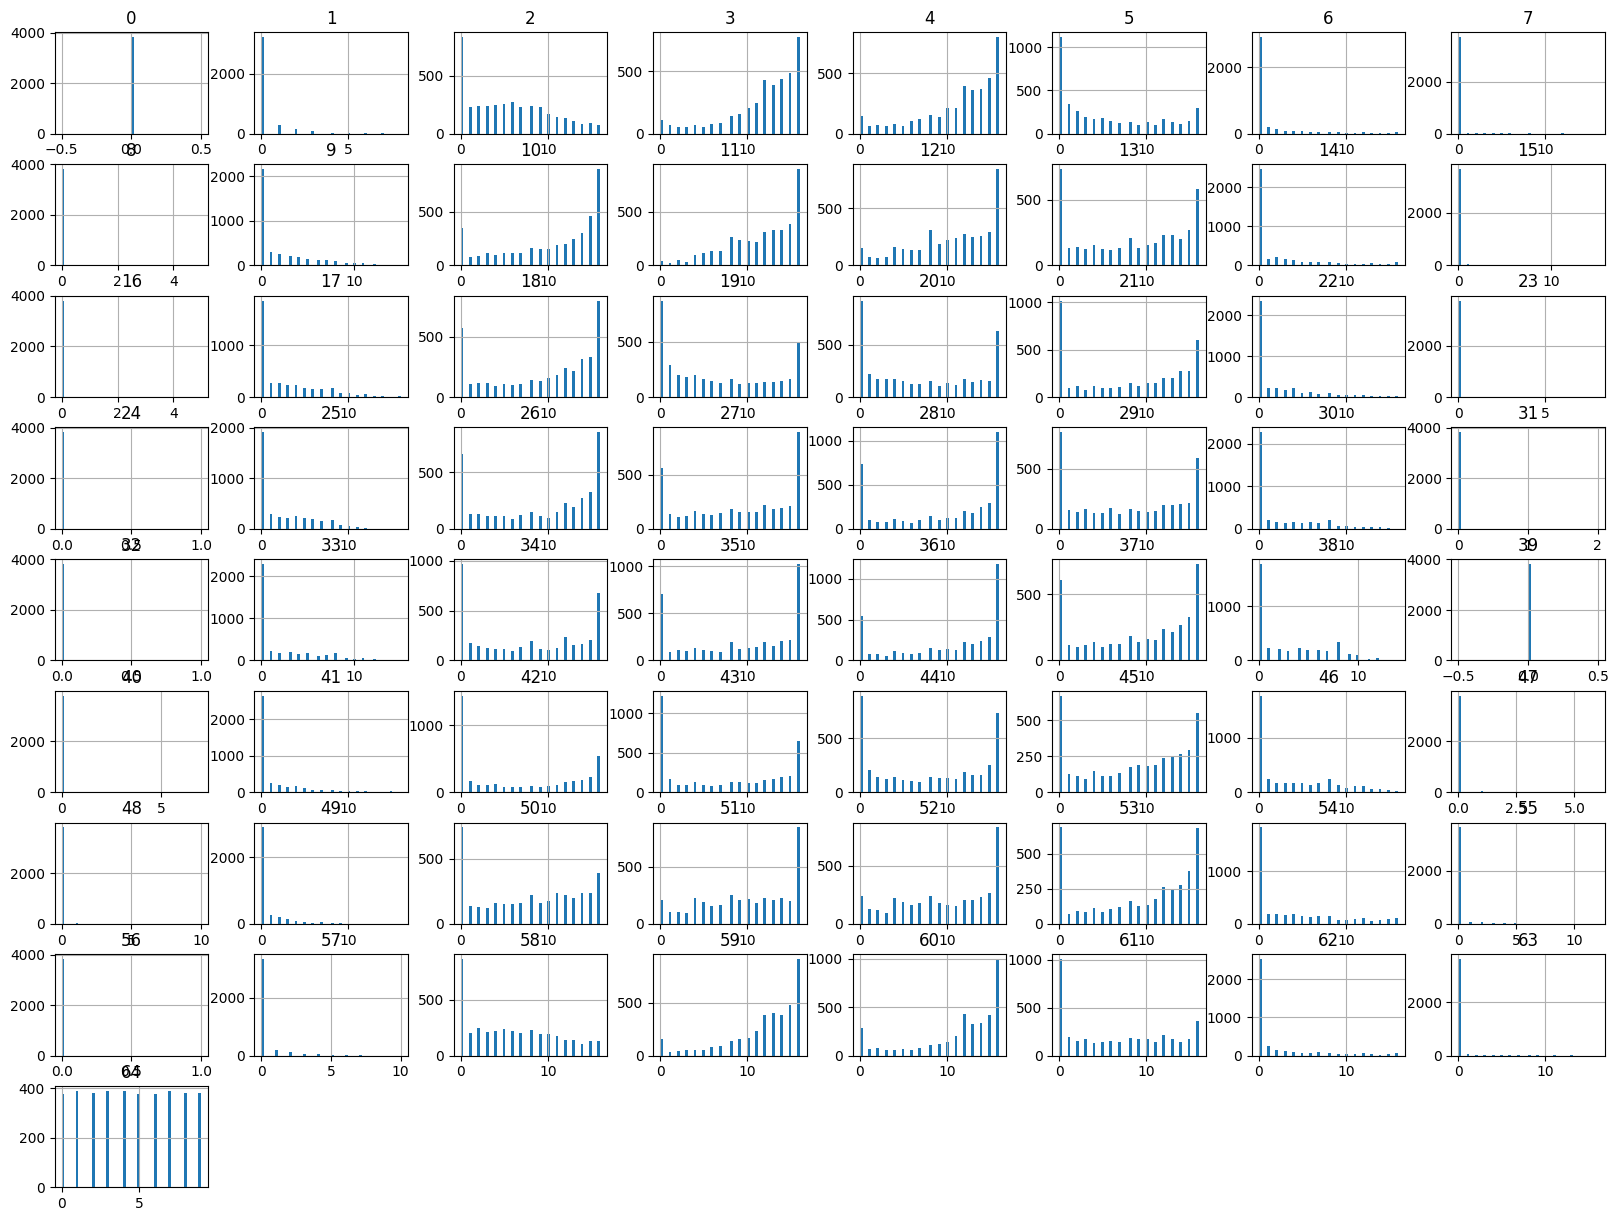

In [ ]:
train.hist(bins=50, figsize=(20,15))
plt.show()

Como se puede observar hay bastantes atributos que no merecen la pena porque siempre toman el mismo valor, por lo que no discriminan clases.

In [ ]:
from tabulate import tabulate
valores_nulos = train.isnull().sum()

print(valores_nulos)

hay_nulos = False
for v in valores_nulos:
  if v != 0:
    hay_nulos = True
    break

print('Hay valores nulos: ', hay_nulos)

0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64
Hay valores nulos:  False


No hay valores nulos, por tanto vamos a tener problemas con los valores nulos.

In [ ]:
#Separar los atributos de las clases
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

Vamos a quitar los atributos con poca variabilidad. Para eso calculamos las varianzas y quitamos los atributos cuya varianza sea menor o igual que 0.1.

In [ ]:
# Vamos a deshacernos de los datos con poca variabilidad
# Para ello, vamos a calcular la varianza de cada variable

train = pd.DataFrame(X_train)
test = pd.DataFrame(X_test)

varianzas = train.var()

# Vamos a seleccionar las variables con varianza mayor que 0.1

variables_seleccionadas = varianzas[varianzas > 0.1].index

train = train[variables_seleccionadas]
test = test[variables_seleccionadas]

print('Numero de variables seleccionadas: ', train.shape[1])

Numero de variables seleccionadas:  53


Quitamos los valores atípicos usando Isolation Forest, asumimos una contaminación del 5%.

In [ ]:
# Vamos a quitar valores atípicos
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(train)

outliers = clf.predict(train)

train = train[outliers == 1]
y_train = y_train[outliers == 1]

print('Número de outliers eliminados: ', sum(outliers == -1))

Número de outliers eliminados:  192


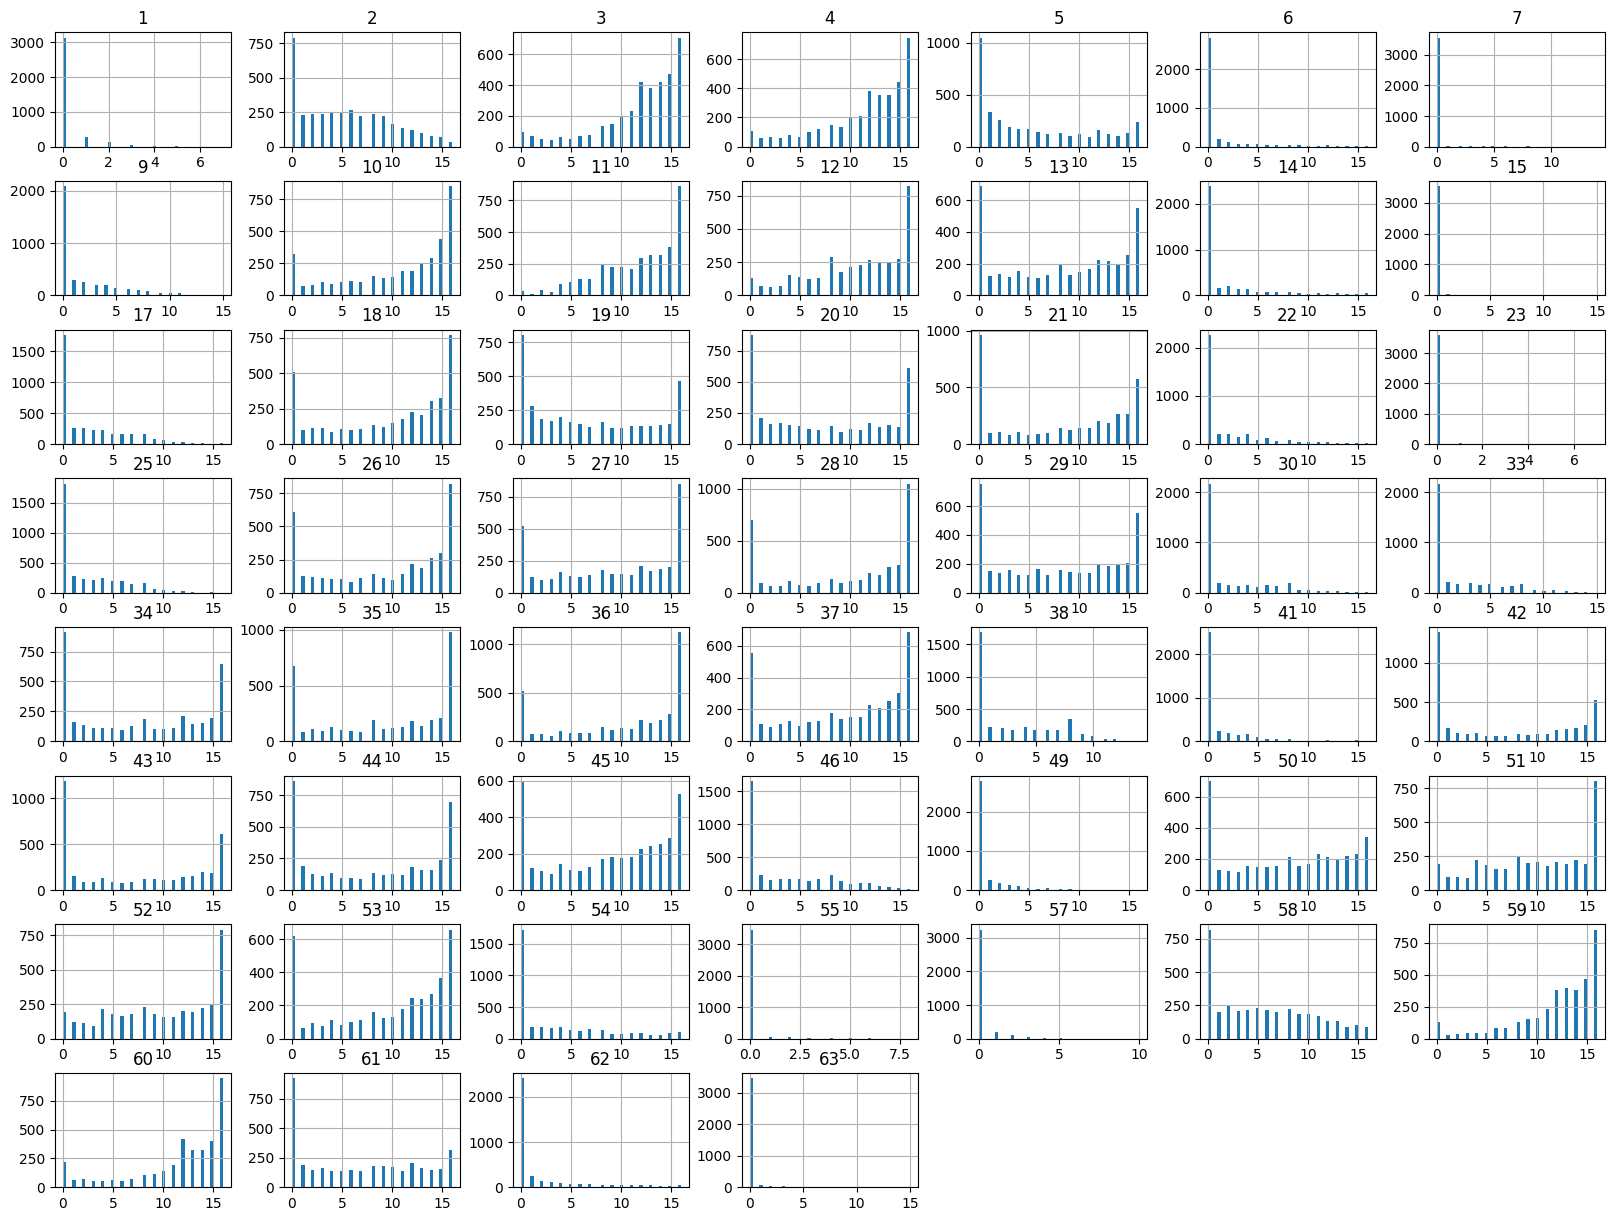

+-------+-------------+------------+------------+------------+------------+------------+--------------+------------+------------+------------+------------+------------+------------+--------------+------------+------------+------------+------------+------------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+------------+------------+------------+------------+------------+-------------+-------------+------------+------------+------------+------------+------------+-------------+
|       |           1 |          2 |          3 |          4 |          5 |          6 |            7 |          9 |         10 |         11 |         12 |         13 |         14 |           15 |         17 |         18 |         19 |         20 |         21 |         22 |          23 |   

In [ ]:
# Dibujar un histograma con la distribución de las clases tras eliminar outliers y variables con poca variabilidad
summary = train.describe()

train.hist(bins=50, figsize=(20,15))
plt.show()

print(tabulate(summary, headers='keys', tablefmt='psql'))

In [ ]:
X_train = train.to_numpy()

Vamos a ver como se comporta PCA para reducir variables ya que sabemos que hay variables que se pueden eliminar.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

# Hacemos un pipeline que primero estandariza los datos y luego aplica PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=0.9))

# Ajustamos el modelo a los datos
pca_result = pipeline.fit_transform(X_train)

# Mostramos el número de componentes seleccionados
print(f'Número de componentes seleccionados: {pipeline.named_steps["pca"].n_components_}')

Número de componentes seleccionados: 27


Por ejemplo para un nivel del varianza del 90% se eliminan alrededor de la mitad de varibles, de más de 60 a 32. Vamos a probar primero a hacer el ajuste sin PCA.

Vamos hacer un Grid Search con 5-Croos-Validation para averiguar que modelo va mejor entre 3.

He escogido KNN, SVM y Random Forest porque van muy bien en problemas de clasificación. Para ver cual es el mejor de todos usaremos como evaluación la tasa de acierto ya que se trata de un problema de clasificación.

In [ ]:
# Comparamos resultados sin haber aplicado PCA

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

pipelines = {
    'SVM': Pipeline([('scaler', StandardScaler()), ('svm', SVC())]),
    'Random Forest': Pipeline([('random_forest', RandomForestClassifier())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
}

param_grids = {
    'SVM': {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    'Random Forest': {'random_forest__n_estimators': [10, 50, 100, 200, 300], 'random_forest__random_state': [42], 'random_forest__max_depth': [None, 10, 20, 30]},
    'KNN': {'knn__n_neighbors': [1, 3, 5]}
}

results = []

for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    results.append([model_name, best_params, best_score])

# Convertir resultados a DataFrame de Pandas
df_results = pd.DataFrame(results, columns=["Model", "Best Parameters", "Best Score"])

print("Resultados:")
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False))

Resultados:
+---------------+-----------------------------------------------------------------------------------------------------------+--------------+
| Model         | Best Parameters                                                                                           |   Best Score |
|---------------+-----------------------------------------------------------------------------------------------------------+--------------|
| SVM           | {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}                                                  |     0.987606 |
| Random Forest | {'random_forest__max_depth': None, 'random_forest__n_estimators': 200, 'random_forest__random_state': 42} |     0.977694 |
| KNN           | {'knn__n_neighbors': 1}                                                                                   |     0.971357 |
+---------------+-----------------------------------------------------------------------------------------------------------+--------------+


Ahora usaremos PCA para posiblemente mejorar los resultados. Ahora solamente usaremos SVM y Random Forest para ver cual va mejor, ajustando más finamente los parametros.

In [ ]:
# Ahora aplicando PCA

pipelines = {
    'SVM': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('svm', SVC())]),
    'Random Forest': Pipeline([('pca', PCA()), ('random_forest', RandomForestClassifier())])
}

param_grids = {
    'SVM': {'svm__C': [5, 10, 100], 'svm__gamma': [0.005, 0.01, 0.02], 'pca__n_components': [0.8, 0.9, 0.95, 0.99], 'svm__kernel': ['rbf']},
    'Random Forest': {'random_forest__n_estimators': [10, 50, 100, 200, 300], 'pca__n_components': [0.8, 0.9, 0.95, 0.99], 'random_forest__random_state': [42]}
}

results = []

for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    results.append([model_name, best_params, best_score])

# Convertir resultados a DataFrame de Pandas
df_results = pd.DataFrame(results, columns=["Model", "Best Parameters", "Best Score"])

print("Resultados:")
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False))

Resultados:
+---------------+----------------------------------------------------------------------------------------------------+--------------+
| Model         | Best Parameters                                                                                    |   Best Score |
|---------------+----------------------------------------------------------------------------------------------------+--------------|
| SVM           | {'pca__n_components': 0.99, 'svm__C': 5, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}                 |     0.987606 |
| Random Forest | {'pca__n_components': 0.99, 'random_forest__n_estimators': 200, 'random_forest__random_state': 42} |     0.972462 |
+---------------+----------------------------------------------------------------------------------------------------+--------------+


Ponemos a prueba el mejor modelo encontrado, SVM con PCA components 0.99, SVM_C 5, gamma de 0.01 y kernel rbf.

In [ ]:
best_pipeline = pipelines['SVM']
best_params = {'pca__n_components': 0.99, 'svm__C': 5, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

best_pipeline.set_params(**best_params)
best_pipeline.fit(X_train, y_train)

X_test = test.to_numpy()

y_test_pred = best_pipeline.predict(X_test)
y_train_pred = best_pipeline.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

df_results = pd.DataFrame([[train_accuracy, test_accuracy, train_f1, test_f1]], columns=["Train Accuracy", "Test Accuracy", "Train F1", "Test F1"])

print("Resultados:")
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False))

print("Variables seleccionadas:")
print(best_pipeline.named_steps['pca'].n_components_)
print("Total de variables después de quitar los atributos de poca variabilidad:")
print(X_train.shape[1])

Resultados:
+------------------+-----------------+------------+-----------+
|   Train Accuracy |   Test Accuracy |   Train F1 |   Test F1 |
|------------------+-----------------+------------+-----------|
|         0.998898 |        0.974402 |   0.998899 |  0.974408 |
+------------------+-----------------+------------+-----------+
Variables seleccionadas:
47
Total de variables después de quitar los atributos de poca variabilidad:
53


### Conclusión

En este problema expecífico de clasificación SVM va muy bien, incluso mejor que Random Forest, el cual me esperaba que ganase. Pero puede que Random Forest sea mejor que SVM con cierta configuración, ya que no he probado estimadores de forma aleatoria.

En cuanto a los resultados se ve como el modelo se ajusta muy bien a train, pero no tan bien a test. Esto puede ser debido a varios factores, pero no creo que sea overfitting debido al 5-Cross-Validation y a que he probado otros modelos y se sobreajustan más que SVM, tales como Random Forest.



---

## <font color='blue'> Ejercicio 3: PROBLEMA DE REGRESIÓN (4 puntos).

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema $\textit{YearPredictionMSD}$ (https://archive.ics.uci.edu/dataset/203/yearpredictionmsd). Este conjunto de datos contiene información (características sonoras) de distintas canciones, y el objetivo es predecir el año de publicación de la canción (hay 89 posibles años a predecir). Cada fila/ejemplo contiene 90 valores reales y un valor entero, correspondiente con el año de la canción, en el rango $[1922, 2011]$). En total hay 515345 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
datos = np.loadtxt("drive/MyDrive/Colab Notebooks/regresion/YearPredictionMSD.txt",delimiter=",")
datos.shape

(515345, 91)

Separamos los atributos del atributo a predecir que es el año, que está en la primera columna.

Después, cogemos como test el 20% de la muestra y el resto lo usamos como train.

In [ ]:
# a cubrir por el alumnado

X = datos[:,1:]
y = datos[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dibujamos el histograma de las clases para ver la distribución de esta.

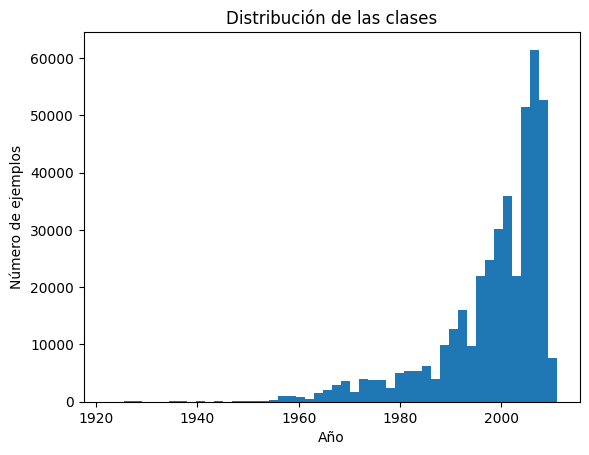

In [ ]:
# Dibujar un histograma con la distribución de las clases
plt.figure()
plt.hist(y_train, bins=50)
plt.xlabel('Año')
plt.ylabel('Número de ejemplos')
plt.title('Distribución de las clases')

plt.show()

Como vemos que no hay muchas instancias anteriores a los 90s las quitamos directamente.

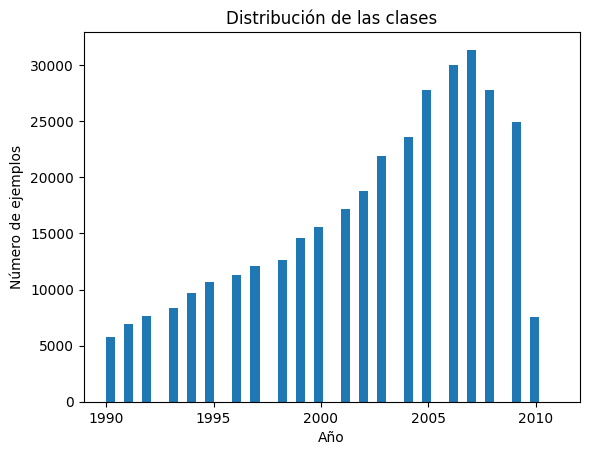

In [ ]:
# Quitar los valores anteriores a 1990

X_train = X_train[y_train >= 1990]
y_train = y_train[y_train >= 1990]

# Dibujar un histograma con la distribución de las clases
plt.figure()
plt.hist(y_train, bins=50)
plt.xlabel('Año')
plt.ylabel('Número de ejemplos')
plt.title('Distribución de las clases')

plt.show()

Vemos si hay valores nulos en las tablas.

In [ ]:
# Vemos el número de valores nulos
print('Número de valores nulos en X_train:', np.sum(np.isnan(X_train)))
print('Número de valores nulos en y_train:', np.sum(np.isnan(y_train)))

Número de valores nulos en X_train: 0
Número de valores nulos en y_train: 0


Dibujamos las variables en un histograma para ver como se distribuyen.

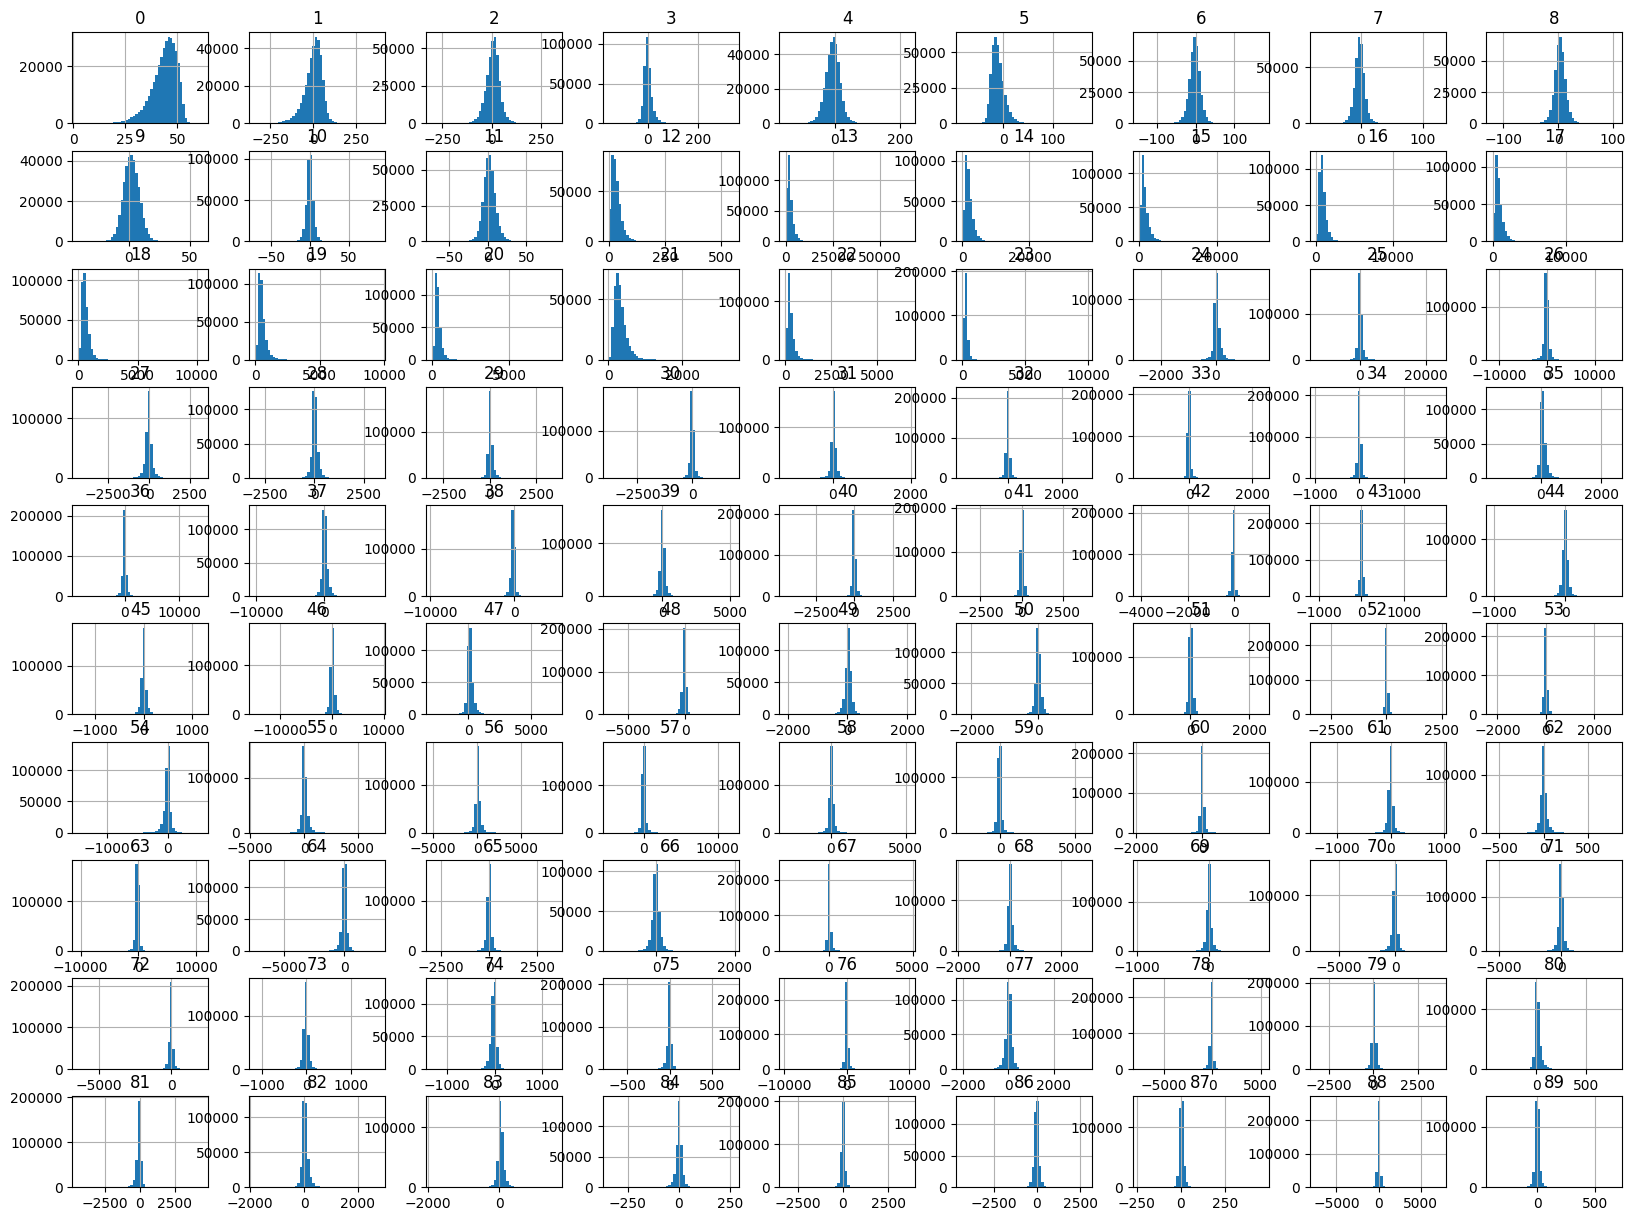

+-------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+---------------+--------------+--------------+-------------+-------------+-------------+-------------+--------------+-------------+--------------+--------------+-------------+--------------+--------------+-------------+-------------+-------------+-------------+--------------+-------------+--------------+--------------+--------------+--------------+----------------+-------------+-------------+-------------+-------------+-------------+--------------+-------------+-------------+--------------+---------------+--------------+-------------+--------------+-------------+-------------+--------------+-------------+--------------+---------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+---------------+--------------+--------------+--------------+--------------+---------------+-----

In [ ]:
#Dibujar un histograma con todas las variables

summary = pd.DataFrame(X_train).describe()

pd.DataFrame(X_train).hist(bins=50, figsize=(20,15))
plt.show()

print(tabulate(summary, headers='keys', tablefmt='psql'))

Intentamos quitar las variables con poca predictibilidad, pero como la varianza de las variables no es baja no se espera poder quitar ninguna.

In [ ]:
# Quitar variables con poca variabilidad

varianzas = np.var(X_train, axis=0)

variables_seleccionadas = varianzas > 0.1

X_train = X_train[:, variables_seleccionadas]
X_test = X_test[:, variables_seleccionadas]

print('Número de variables seleccionadas: ', X_train.shape[1])

Número de variables seleccionadas:  90


Quitamos los valores atípicos asumiendo un 20% de contaminación.

In [ ]:
# Quitar valores atípicos

clf = IsolationForest(contamination=0.2, random_state=42)
clf.fit(X_train)

outliers = clf.predict(X_train)

X_train = X_train[outliers == 1]
y_train = y_train[outliers == 1]

print('Número de outliers eliminados: ', sum(outliers == -1))
print('Instacias totales tras eliminar outliers: ', X_train.shape[0])

Número de outliers eliminados:  69291
Instacias totales tras eliminar outliers:  277163


Vemos como quedan los histogramas después de los cambios anteriores.

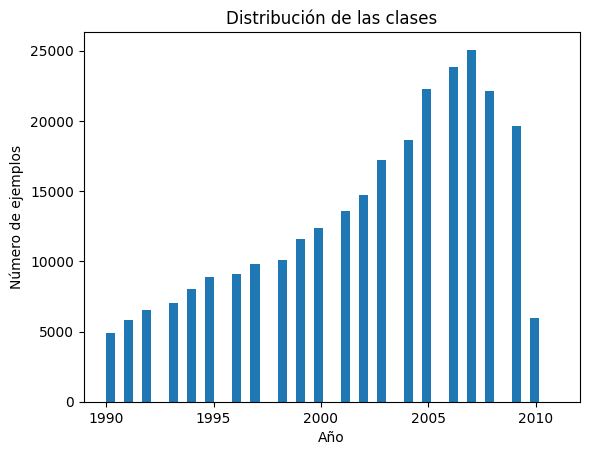

In [ ]:
# Dibujar un histograma con la distribución de las clases
plt.figure()
plt.hist(y_train, bins=50)
plt.xlabel('Año')
plt.ylabel('Número de ejemplos')
plt.title('Distribución de las clases')

plt.show()

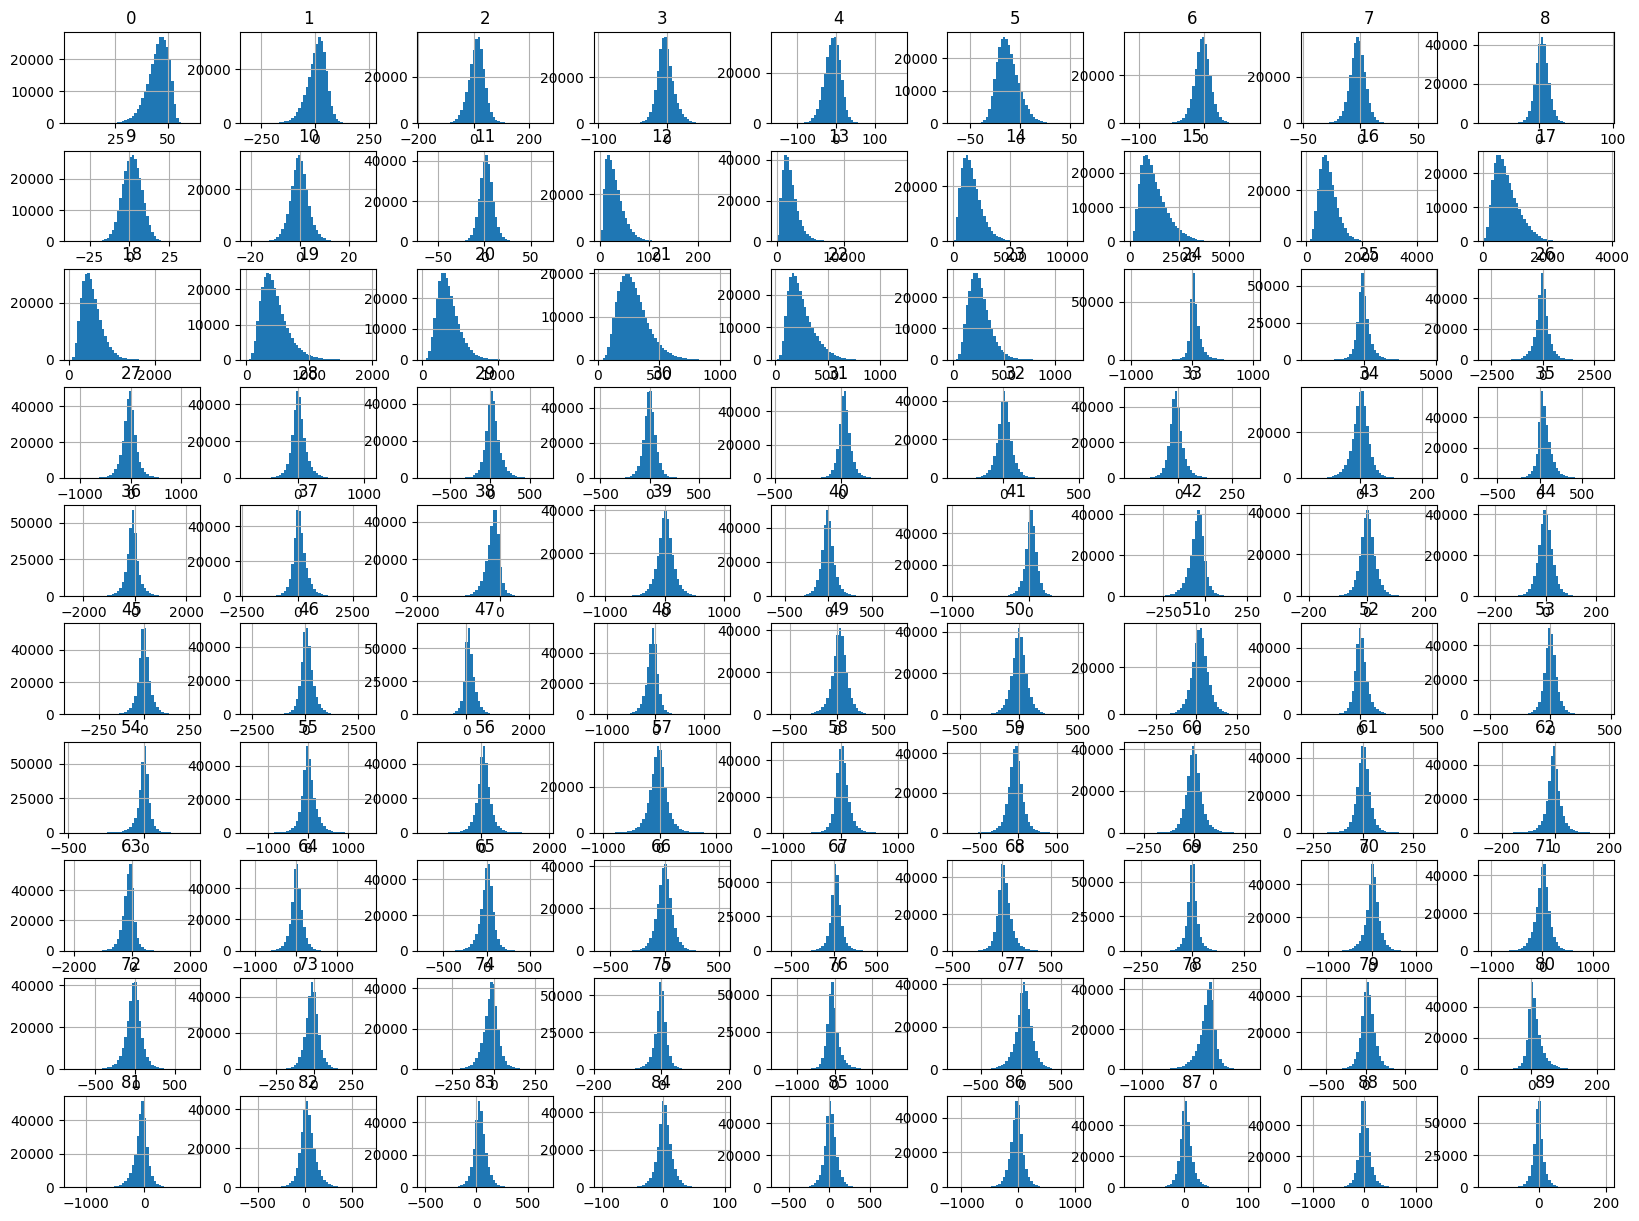

+-------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+----------------+--------------+--------------+-------------+-------------+-------------+------------+-------------+-------------+--------------+-------------+------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+-------------+---------------+--------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+--------------+-------------+-------------+--------------+---------------+--------------+-------------+--------------+--------------+-------------+--------------+--------------+--------------+--------------+--------------+-------------+-------------+-------------+-------------+-------------+---------------+--------------+--------------+--------------+-------------+---------------+--------------+----------

In [ ]:
#Dibujar un histograma con todas las variables

summary = pd.DataFrame(X_train).describe()

pd.DataFrame(X_train).hist(bins=50, figsize=(20,15))
plt.show()

print(tabulate(summary, headers='keys', tablefmt='psql'))

Tras haber procesado los datos pasamos ha hacer un grid search. Debido a que el conjunto de datos es muy grande, realizamos un hold_out en vez de un croos validation.

Probamos LinearRegression y RandomForestRegressor, porque sirven bien para problemas de regresión. SVR no lo uso porque tarda mucho tiempo en ejecutarse

In [ ]:
# Ajustamos los valores usando PCA y StandardScaler
# Probamos diferentes valores de n_components y modelos para ajuste de regresión

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import ShuffleSplit, GridSearchCV

pipelines = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('linear_regression', LinearRegression())]),
    'Random Forest': Pipeline([('pca', PCA()), ('random_forest', RandomForestRegressor())])
}

param_grids = {
    'Linear Regression': {'pca__n_components': [0.8, 0.85, 0.9, 0.95], 'linear_regression__fit_intercept': [True, False]},
    'Random Forest': {'pca__n_components': [0.8], 'random_forest__n_estimators': [5, 10, 20], 'random_forest__random_state': [42]}
}

results = []

for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=ShuffleSplit(n_splits=1, test_size=0.08, random_state=42, train_size=0.4), n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    results.append([model_name, best_params, best_score])

# Convertir resultados a DataFrame de Pandas
df_results = pd.DataFrame(results, columns=["Model", "Best Parameters", "Best Score"])

print("Resultados:")
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False))

Resultados:
+-------------------+--------------------------------------------------------------------------------------------------+--------------+
| Model             | Best Parameters                                                                                  |   Best Score |
|-------------------+--------------------------------------------------------------------------------------------------+--------------|
| Linear Regression | {'linear_regression__fit_intercept': True, 'pca__n_components': 0.95}                            |     -24.3221 |
| Random Forest     | {'pca__n_components': 0.8, 'random_forest__n_estimators': 20, 'random_forest__random_state': 42} |     -29.7657 |
+-------------------+--------------------------------------------------------------------------------------------------+--------------+


Evaluamos con el mejor modelo teniendo en cuenta que los valores anteriores a 1990 no se pueden predecir porque los hemos quitado.

In [ ]:
from sklearn.metrics import mean_squared_error

best_pipeline = pipelines['Linear Regression']
best_params = {'linear_regression__fit_intercept': True, 'pca__n_components': 0.95}

best_pipeline.set_params(**best_params)
best_pipeline.fit(X_train, y_train)

# Quitar los valores anteriores a 1990 porque no se pueden predecir
X_test = X_test[y_test >= 1990]
y_test = y_test[y_test >= 1990]

y_test_pred = best_pipeline.predict(X_test)
y_train_pred = best_pipeline.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

df_results = pd.DataFrame([[train_mse, test_mse]], columns=["Train MSE", "Test MSE"])

print("Resultados:")
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False))

Resultados:
+-------------+------------+
|   Train MSE |   Test MSE |
|-------------+------------|
|      24.003 |    26.3403 |
+-------------+------------+


In [ ]:
print(y_test)
print(y_test_pred)

[2008. 2001. 2006. ... 1995. 2002. 2007.]
[2000.11908078 1996.88527443 2000.44818161 ... 1994.13010014 2001.4983402
 2004.64982951]


Lineal Regresor hace un trabajo aceptable para este problema, da unos resultados bastante buenos y no hace overfitting por los parametros introducidos.